# Credit Risk Analysis for XYZ Corp

# Problem Statement/Case Description:
Based on the data available from loan applications, the XYZ Corp. is looking towrads building a model to predict default in the future, which will help the them in deciding whether sanction a loan or not.

As the data contains information on defaulters, successful payers and customers who were current during that time (2007 to 2015), customers under ‘current’ status must be considered non-defaulters during this problem solving.

# Scope and Objective Of Data:
Based on the available dataset of XYZ Corp. (for the period of: 2007-2015), we are going to work on the scope of building models (on training data) and measure its performance (on test data) on the available dataset which helps in reducing the companies risk by predicting customers who are likely to default and increasing the profits by improving loan accessibility to the customers.

Complete loan data for all loan issued by XYZ Corp. from 2007 to 2015 is available. This data contains the indicator of default, payment information, credit history etc.

# IMPORTING Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.width' , None)

# Import Dataset

In [4]:

data = pd.read_csv('XYZCorp_LendingData.txt',sep="\t",low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
data.shape

(855969, 73)

In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [8]:
data.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

In [9]:
#Creating copy of dataset
data1 = pd.DataFrame.copy(data)

# Exploratory Data Analysis

In [10]:
#Checking the null values in the data.
data1.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

## Visualising the missing values in each column

<AxesSubplot:>

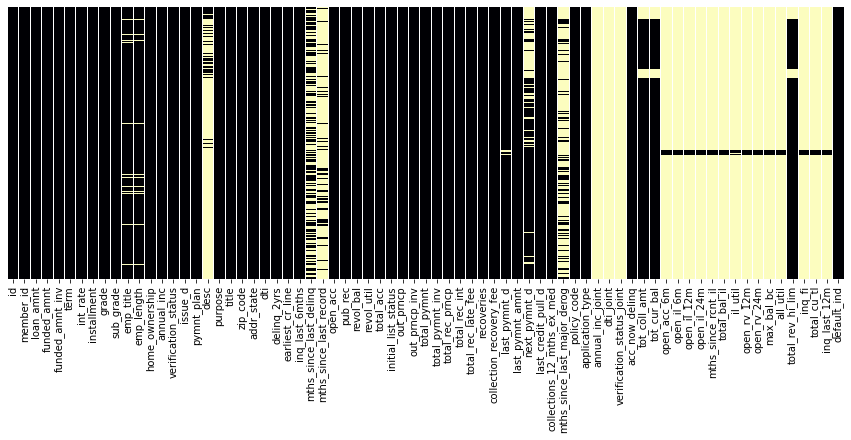

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(data1.isnull(), cbar = False, yticklabels=False, cmap="magma" )

### percentagewise missing values in the data


In [12]:
total = data1.isnull().sum().sort_values(ascending=False)
percent= (data1.isnull().sum()/data1.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(30)

,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


## Drop missing value Over 75%

In [13]:
for i in data1.columns:
    if missing_data.loc[i,'Percent'] >= 75:
        data1=data1.drop(i,axis=1)

<AxesSubplot:>

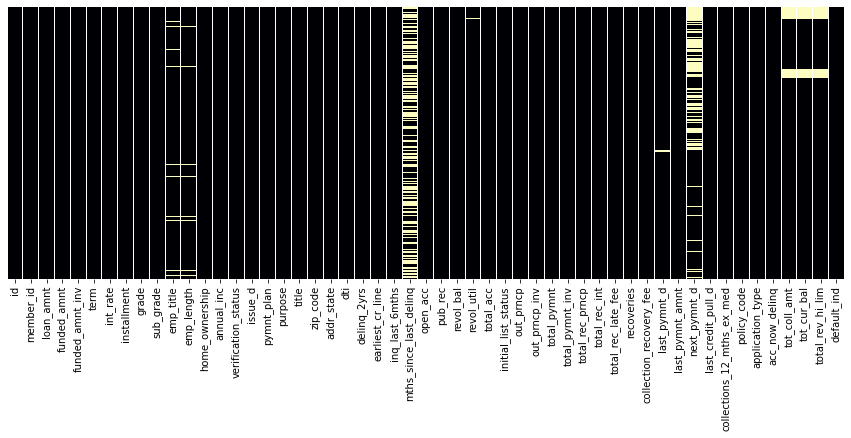

In [14]:
# Visualizing the missing value in each column after dropping the above 75% missing value variables
plt.figure(figsize=(15,5))
sns.heatmap(data1.isnull(), cbar = False, yticklabels=False, cmap="magma" )

We observe 20 columns are dropped which had more than 75% NAN values of the total datapoint, hence they would not have contributed towards prediction. For the remaining columns which have null values we will check and treat them using various methods

In [15]:
data1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [16]:
data1.shape

(855969, 53)

## Duplicate observations

In [17]:
data.duplicated().value_counts()

False    855969
dtype: int64

## drop irrelevant variables

In [18]:
print(data.application_type.value_counts())

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


In [19]:
print(data.acc_now_delinq.value_counts())

0.0     852039
1.0       3693
2.0        198
3.0         28
4.0          6
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64


In [20]:
print(data.earliest_cr_line.value_counts())

Aug-2001    6433
Aug-2000    6322
Oct-2000    6117
Oct-2001    5924
Aug-2002    5858
Sep-2000    5712
Nov-1999    5654
Oct-1999    5630
Nov-2000    5610
Sep-2002    5604
Oct-2002    5493
Sep-2001    5485
Sep-2003    5419
Aug-1999    5418
Sep-1999    5398
Jul-2001    5168
Nov-2001    5044
Aug-2003    5022
Oct-2003    5012
Mar-2001    5007
Sep-1998    4979
Dec-2000    4934
May-2001    4875
Dec-2001    4863
Dec-1999    4855
Sep-2004    4849
Jul-2000    4838
Oct-1998    4767
Jun-2001    4765
Mar-2000    4735
Jul-2002    4681
May-2000    4681
Jun-2000    4655
Jan-2001    4616
Dec-1998    4583
Jul-2003    4570
Nov-1998    4567
Apr-2001    4529
Aug-1998    4501
Feb-2000    4450
Aug-2004    4448
May-2002    4399
Nov-2002    4382
Jul-1999    4343
Mar-1999    4327
Jan-2000    4325
Oct-2004    4291
Jan-2002    4282
Oct-1997    4260
Mar-2002    4248
Feb-2001    4242
May-2003    4217
Apr-2002    4202
Nov-2003    4165
Apr-2000    4157
Feb-2002    4128
Dec-2002    4072
Jun-1999    4029
Jun-2002    39

In [21]:
print(data.title.value_counts())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



- id and member_id ==> id and member_id are all unique which is a bit misleading. So every record is a unique customer 
- application_type ==> application_type is 'INDIVIDUAL' having 855527 records which is  99.94% of the records
- acc_now_delinq ==> acc_now_delinq is 0 having 852039 records which is  99.5% of the records
- emp_title ==> emp_title not needed here
- zip_code ==> zip_code not needed for this level of analysis
- title ==> title variable because it's a categorical varibale with (60991 level)
- earliest_cr_line ==> earliest_cr_line variable because it's a date varibale with (697 level)
- next_pymnt_d ==> as per the domain knowledge it is also not imp variable
- other few variables we deleted according to domain knowledge

In [22]:
data1 = data1.drop(['id' ,'member_id', 'sub_grade' , 
                    'emp_title' , 'title' , 'zip_code' , 
                    'addr_state' ,
                    'earliest_cr_line',
                   'inq_last_6mths' , 'pub_rec' ,
                    'initial_list_status' ,
                    'recoveries' ,'next_pymnt_d',
                    'collection_recovery_fee' , 
                    'acc_now_delinq',
                   'policy_code' , 'tot_coll_amt' , 
                    'collections_12_mths_ex_med']
                   ,axis = 1)

In [23]:
data1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [24]:
data1.shape

(855969, 35)

### Variable Transformations

- Extract numbers from emp_length and fill missing values with the mode. If emp_length == 10+ years then leave it as 10

In [25]:
def emplen(row):
    return str(row.replace('10+ years' , '10').replace('9 years' , '9').replace('8 years' , '8').replace('7 years' , '7')
          .replace('6 years' , '6').replace('5 years' , '5').replace('4 years' , '4').replace('3 years' , '3')
          .replace('2 years' , '2').replace('1 year' , '1').replace('< 1 year' , '< 1'))

data1['emp_length'] = data1['emp_length'].astype(str).apply(emplen)
data1['emp_length'] = data1['emp_length'].replace('< 1' , '0' , regex = True)

data1['emp_length'] = data1['emp_length'].replace('nan' , '10' , regex = True) #replacing with mode value.

# Outliers Checking.

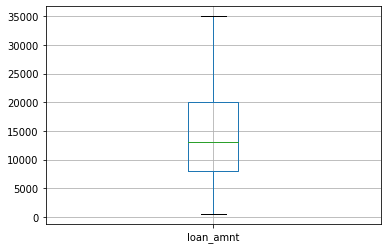

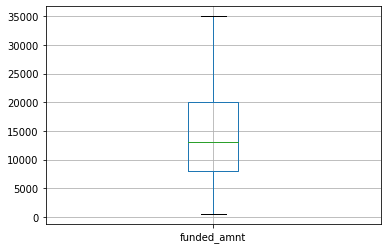

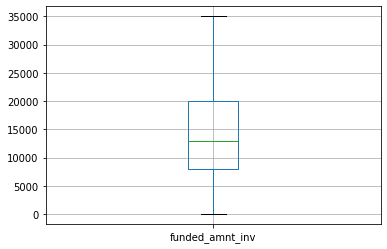

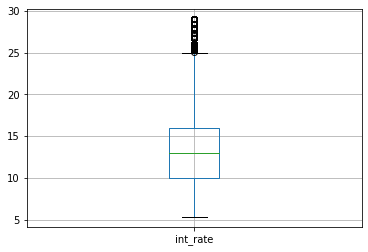

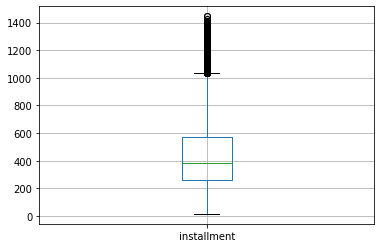

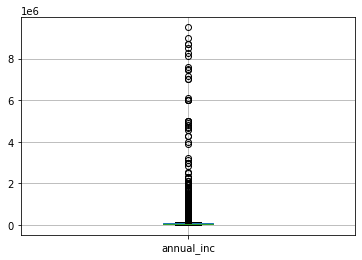

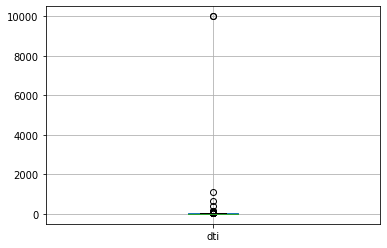

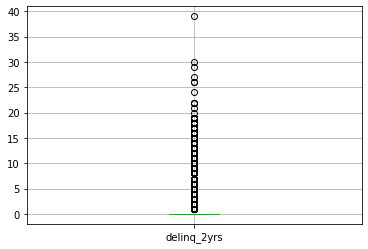

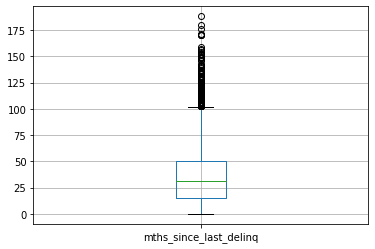

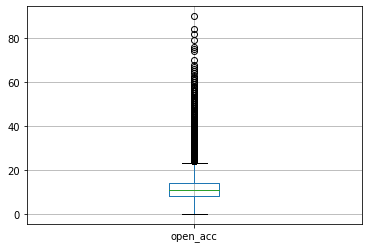

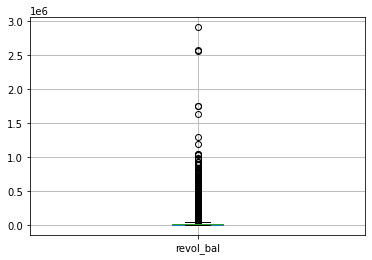

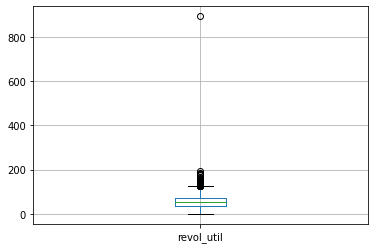

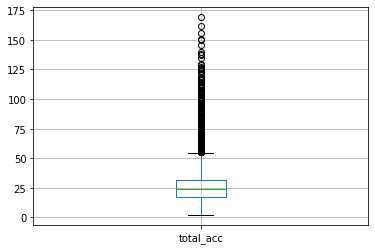

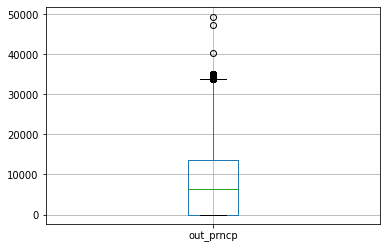

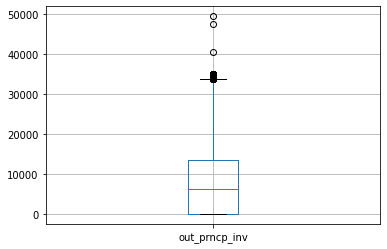

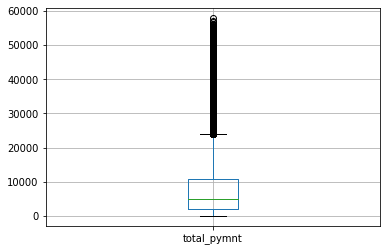

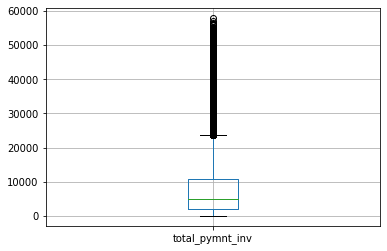

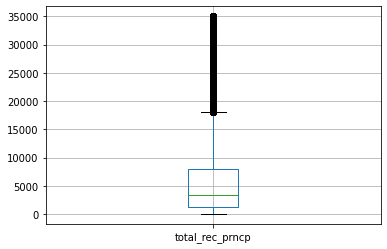

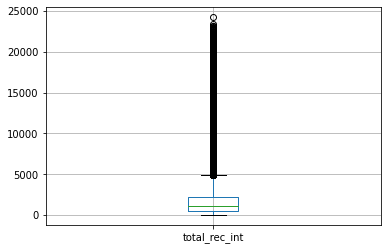

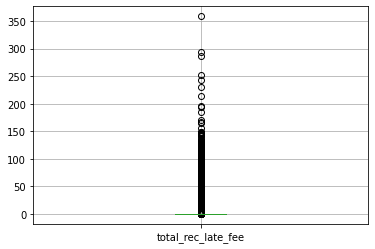

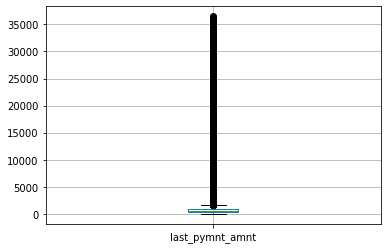

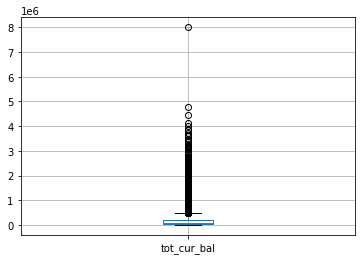

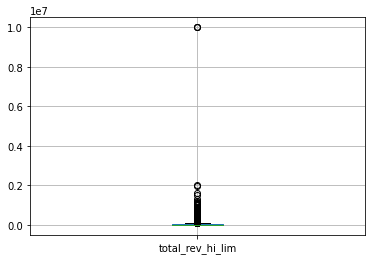

In [26]:
# to generate boxplot for all numerical varibales

import matplotlib.pyplot as plt
colname=[]
for x in data1.columns[:-1]:
    if data1[x].dtype=="int64" or data1[x].dtype=="float64":
        colname.append(x)

for x in colname:
    data1.boxplot(column=x)
    plt.show()

In [27]:
print(data['revol_util'].describe())
print(data['dti'].describe())

count    855523.000000
mean         55.019405
std          23.811585
min           0.000000
25%          37.600000
50%          55.900000
75%          73.500000
max         892.300000
Name: revol_util, dtype: float64
count    855969.000000
mean         18.122165
std          17.423629
min           0.000000
25%          11.880000
50%          17.610000
75%          23.900000
max        9999.000000
Name: dti, dtype: float64


revol_util  has only one variable above 193 and that is 892 and dti has only one variable above 1093 which is 9999. So,we are removing those 2 observations

In [28]:
data1.drop(data1.index[data1['revol_util'] == 892.300000], inplace = True)
data1.drop(data1.index[data1['dti'] == 9999.000000], inplace = True)

In [29]:
print(data1['revol_util'].describe())
print(data1['dti'].describe())

count    855520.000000
mean         55.018385
std          23.794386
min           0.000000
25%          37.600000
50%          55.900000
75%          73.500000
max         193.000000
Name: revol_util, dtype: float64
count    855966.000000
mean         18.098848
std           8.415562
min           0.000000
25%          11.880000
50%          17.610000
75%          23.900000
max        1092.520000
Name: dti, dtype: float64


## plots to study trends

#### Categorical variables

In [30]:
def make_bar(attr, title, ylabel):
    heights = data1[attr].value_counts().tolist()
    names = []
    for k, v in data1[attr].value_counts().items():
        names.append(k)
        
    for ii, height in enumerate(heights):
        color = np.random.random_sample(3)
        plt.bar(ii, height, color=color)
        
    plt.title(title)
    plt.ylabel(ylabel)
    plt.gca().set_xticklabels(names)
    plt.gca().set_xticks(np.arange(len(names)) + .4)
    
    if len(names) > 5:
        plt.xticks(rotation=90)
    plt.show()
    

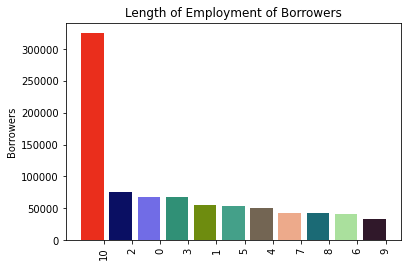

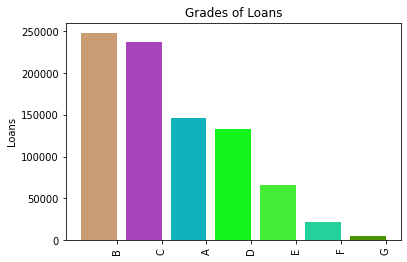

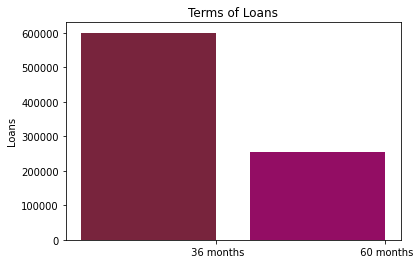

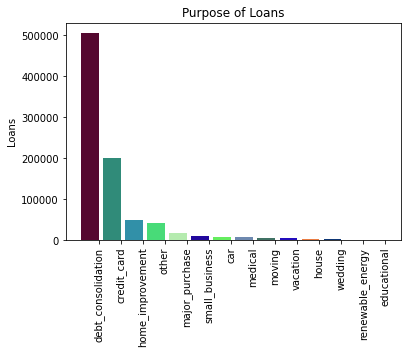

In [31]:
# We plot different variables to visualize them
make_bar('emp_length', 'Length of Employment of Borrowers', 'Borrowers')
make_bar('grade', 'Grades of Loans', 'Loans')
make_bar('term', 'Terms of Loans', 'Loans')
make_bar('purpose', 'Purpose of Loans', 'Loans')

###### default_ind 

In [32]:
Non_Default = round(data1['default_ind'].value_counts()[0]/len(data1) * 100, 2)

Default = round(data1['default_ind'].value_counts()[1]/len(data1) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(Non_Default))
print('Default Customer : {} % of the dataset'.format(Default))

Non_Default Customer : 94.57 % of the dataset
Default Customer : 5.43 % of the dataset


Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

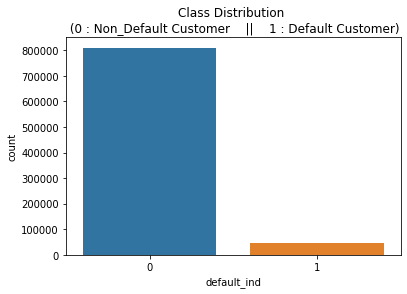

In [33]:
sns.countplot('default_ind', data=data1)
plt.title('Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

###### issue_d

Create a function that will split the issue_d varibale which is nothing but the The month which the loan was funded

In [34]:
def getMonth(x):
    return x.split('-')[0]


def getYear(x):
    return x.split('-')[1]


data1['Month'] = data1.issue_d.apply(getMonth)
data1['Year'] = data1.issue_d.apply(getYear)

<AxesSubplot:xlabel='Year', ylabel='count'>

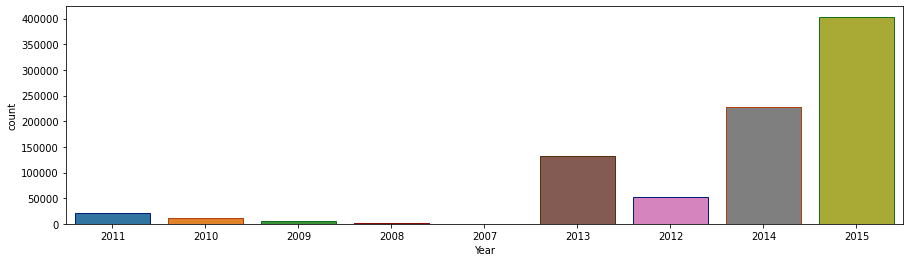

In [35]:
plt.figure(figsize=(15, 4))

sns.countplot(x="Year", data=data1, edgecolor=sns.color_palette("dark", 6))

 an exponential rise in the number of applications over a period of years

<AxesSubplot:xlabel='Month', ylabel='count'>

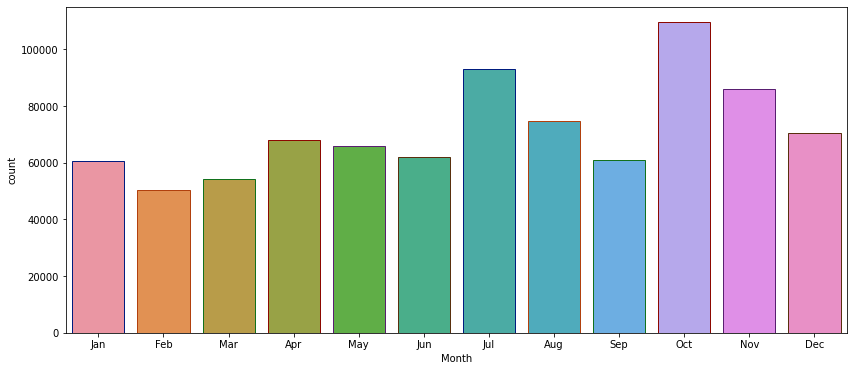

In [36]:
orderby = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))

sns.countplot(x="Month", data=data1, edgecolor=sns.color_palette("dark", 6), order=orderby)

In [37]:
vars_to_be_removed = ['Month','Year']
data1.drop( vars_to_be_removed , axis = 1, inplace = True )

In [38]:
data1.shape

(855966, 35)

Seems that October and July have the highest number of applications

#### Numerical variables

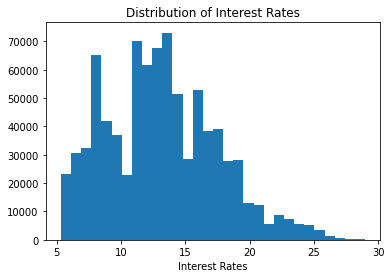

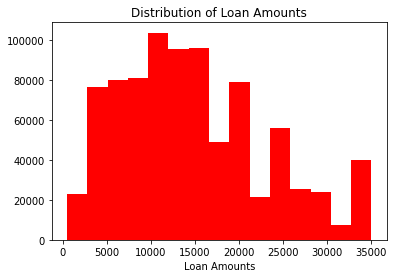

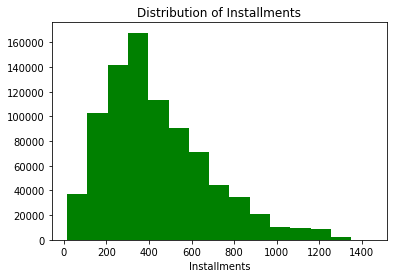

In [39]:
plt.hist(data['int_rate'], bins=30)
plt.title('Distribution of Interest Rates')
plt.xlabel("Interest Rates")
plt.show()

plt.hist(data['loan_amnt'], bins=15, color='red')
plt.title('Distribution of Loan Amounts')
plt.xlabel("Loan Amounts")
plt.show()

plt.hist(data['installment'], bins=15, color='green')
plt.title('Distribution of Installments')
plt.xlabel("Installments")
plt.show()

In [40]:
Non_Default = round(data1['default_ind'].value_counts()[0]/len(data1) * 100, 2)
print(Non_Default)

94.57


## Imputing missing values

In [41]:
data1.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
mths_since_last_delinq    439811
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
last_pymnt_d                8862
last_pymnt_amnt                0
last_credi

In [42]:
data1['mths_since_last_delinq'].describe()

count    416155.000000
mean         34.149923
std          21.868461
min           0.000000
25%          15.000000
50%          31.000000
75%          50.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

In [43]:
data1['mths_since_last_delinq']=data1['mths_since_last_delinq'].fillna(data1['mths_since_last_delinq'].median())

In [44]:
data1.revol_util = data1.revol_util.fillna(data1.revol_util.mean())
data1.tot_cur_bal = data1.tot_cur_bal.fillna(data1.tot_cur_bal.mean())
data1.total_rev_hi_lim = data1.total_rev_hi_lim.fillna(data1.total_rev_hi_lim.mean())

In [45]:
# Since these are dates we will fill the null values with previous values using ffill() function
# Pandas dataframe.ffill() function is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

data1["last_credit_pull_d"].fillna( method ='ffill', inplace = True)
data1["last_pymnt_d"].fillna( method ='ffill', inplace = True) 

In [46]:
data1.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
pymnt_plan                0
purpose                   0
dti                       0
delinq_2yrs               0
mths_since_last_delinq    0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
out_prncp                 0
out_prncp_inv             0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
total_rec_late_fee        0
last_pymnt_d              0
last_pymnt_amnt           0
last_credit_pull_d        0
application_type          0
tot_cur_bal               0
total_rev_hi_lim          0
default_ind               0
dtype: int64

In [47]:
data1.shape

(855966, 35)

<AxesSubplot:>

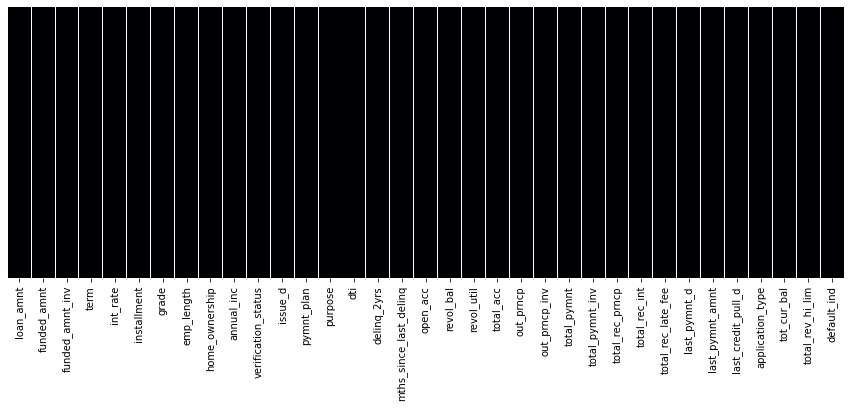

In [48]:
# Visualizing the missing value in each column after imputing missing values
plt.figure(figsize=(15,5))
sns.heatmap(data1.isnull(), cbar = False, yticklabels=False, cmap="magma" )

In [49]:
data1['issue_d'] = pd.to_datetime(data1['issue_d'])

## Feature Engineering and Variable Selection

- Keeping the loan_amount, and  creating a metric which indicates that the total amount committed by investors for that loan at that point in time (funded_amnt_inv) is less than what the borrower requested.
- Then we computed the ratio of the number of open credit lines in the borrower's credit file divided by the total number of credit lines currently in the borrower's credit file.

In [50]:
data1['amt_difference'] = 'eq'
data1.loc[ ( data1['funded_amnt'] - data1['funded_amnt_inv']) > 0, 'amt_difference' ] = 'less'

#---------------------

# Create new metric
data1['acc_ratio'] = data1.open_acc / data1.total_acc

as we convert funded_amnt and funded_amnt_inv into a single variable amt_difference similarly we convert open_acc and total_acc into a single variable acc_ratio.
now we are removing those 4 variables

In [51]:
vars_to_be_removed = ['funded_amnt','funded_amnt_inv',
                     'open_acc','total_acc']
data1.drop( vars_to_be_removed , axis = 1, inplace = True )

In [52]:
data1=data1[['loan_amnt','amt_difference', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'mths_since_last_delinq', 'revol_bal',
       'revol_util','acc_ratio', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind']]

## Label Encoding

In [53]:
colname=[]    
for x in data1.columns[:]:
    if data1[x].dtype=='object':
        colname.append(x)   #append(x) for X increament
colname

['amt_difference',
 'term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [54]:
data1.columns

Index(['loan_amnt', 'amt_difference', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'mths_since_last_delinq', 'revol_bal', 'revol_util',
       'acc_ratio', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [55]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    data1[x]=le.fit_transform(data1[x])

In [56]:
data1.dtypes

loan_amnt                        float64
amt_difference                     int32
term                               int32
int_rate                         float64
installment                      float64
grade                              int32
emp_length                         int32
home_ownership                     int32
annual_inc                       float64
verification_status                int32
issue_d                   datetime64[ns]
pymnt_plan                         int32
purpose                            int32
dti                              float64
delinq_2yrs                      float64
mths_since_last_delinq           float64
revol_bal                        float64
revol_util                       float64
acc_ratio                        float64
out_prncp                        float64
out_prncp_inv                    float64
total_pymnt                      float64
total_pymnt_inv                  float64
total_rec_prncp                  float64
total_rec_int   

###### Divide the data into model training dataset and test dataset.
The model training dataset should be used to train and build models and the final performance should be on Test data

In [57]:
to_date=pd.to_datetime('06/01/2015')
train_data=data1.loc[(data1.issue_d < to_date)]
train_data.shape

(598977, 33)

In [58]:
test_data=data1.loc[(data1.issue_d >= to_date)]
test_data.shape

(256989, 33)

In [59]:
train_data=train_data.drop(['issue_d'], axis=1)
test_data=test_data.drop(['issue_d'], axis=1)

In [60]:
X_train= train_data.values[:,:-1]
Y_train= train_data.values[:,-1]

In [61]:
X_test= test_data.values[:,:-1]
Y_test= test_data.values[:,-1]

In [62]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(598977, 31)
(598977,)
(256989, 31)
(256989,)


### Scaling X_train X_test

In [63]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform (X_test)

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Model Building and Validation

## LogisticRegression

In [65]:
"""from sklearn.linear_model import LogisticRegression
#create a model
classifier = LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
"""

'from sklearn.linear_model import LogisticRegression\n#create a model\nclassifier = LogisticRegression()\n#fitting training data to the model\nclassifier.fit(X_train,Y_train)\n\nY_pred=classifier.predict(X_test)\n'

In [66]:
"""
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
"""

'\nfrom sklearn.metrics import confusion_matrix, accuracy_score, classification_report\n\nconf_matrix = confusion_matrix(Y_test,Y_pred)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report: ")\n\nprint(classification_report(Y_test,Y_pred))\n\nacc=accuracy_score(Y_test, Y_pred)\nprint("Accuracy of the model: ",acc)\n'

## Adjusting Threshold

In [67]:
# store the predicted  probabilities
"""
y_pred_prob = classifier.predict_proba(X_test)
"""
#print(y_pred_prob)

'\ny_pred_prob = classifier.predict_proba(X_test)\n'

In [68]:
"""
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    # cfm[0,1] = type I error  and cfm[1,0] is type II error
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])
          """

'\nfor a in np.arange(0.4,0.61,0.01):\n    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)\n    cfm=confusion_matrix(Y_test, predict_mine)\n    total_err=cfm[0,1]+cfm[1,0]\n    # cfm[0,1] = type I error  and cfm[1,0] is type II error\n    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", \n          cfm[1,0]," , type 1 error:", cfm[0,1])\n          '

In [69]:
# we select the 0.56 as a threshold because total error is also less and type II error is also less 
"""
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)
"""

'\ny_pred_class=[]\nfor value in y_pred_prob[:,1]:\n    if value > 0.60:\n        y_pred_class.append(1)\n    else:\n        y_pred_class.append(0)\n#print(y_pred_class)\n'

In [70]:
"""
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(Y_test,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report :")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model :",acc)
"""

'\nfrom sklearn.metrics import confusion_matrix, accuracy_score, classification_report\n\nconf_matrix = confusion_matrix(Y_test,y_pred_class)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report :")\n\nprint(classification_report(Y_test,y_pred_class))\n\nacc=accuracy_score(Y_test,y_pred_class)\nprint("Accuracy of the model :",acc)\n'

## DecisionTreeClassifier

In [71]:
"""
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)


Y_pred = model_DecisionTree.predict(X_test)
print(Y_pred)
"""

'\nfrom sklearn.tree import DecisionTreeClassifier\n\nmodel_DecisionTree=DecisionTreeClassifier(random_state=10)\n\n#fit the model on the data and predict the values\nmodel_DecisionTree.fit(X_train,Y_train)\n\n\nY_pred = model_DecisionTree.predict(X_test)\nprint(Y_pred)\n'

In [72]:
"""
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
"""

'\nfrom sklearn.metrics import confusion_matrix, accuracy_score, classification_report\n\nconf_matrix = confusion_matrix(Y_test,Y_pred)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report: ")\n\nprint(classification_report(Y_test,Y_pred))\n\nacc=accuracy_score(Y_test, Y_pred)\nprint("Accuracy of the model: ",acc)\n'

# Grid Search CV on Decision Tree

In [73]:
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy'],
          'max_leaf_nodes': list(range(2, 100)),
          'min_samples_split': [2, 3, 4]}
grid_search_cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=10), params, verbose=1, cv=3)
"""

"\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV\nparams = {'criterion':['gini','entropy'],\n          'max_leaf_nodes': list(range(2, 100)),\n          'min_samples_split': [2, 3, 4]}\ngrid_search_cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=10), params, verbose=1, cv=3)\n"

In [74]:
#grid_search_cv_dt.fit(X_train, Y_train)

In [75]:
#grid_search_cv_dt.best_estimator_

### Tunned Decision Tree

In [76]:
"""
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree_Tuned=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=40,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

#fit the model on the data and predict the values
model_DecisionTree_Tuned.fit(X_train,Y_train)


Y_pred = model_DecisionTree_Tuned.predict(X_test)
print(Y_pred)
"""

"\nfrom sklearn.tree import DecisionTreeClassifier\n\nmodel_DecisionTree_Tuned=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',\n                       max_depth=None, max_features=None, max_leaf_nodes=40,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort='deprecated',\n                       random_state=10, splitter='best')\n\n#fit the model on the data and predict the values\nmodel_DecisionTree_Tuned.fit(X_train,Y_train)\n\n\nY_pred = model_DecisionTree_Tuned.predict(X_test)\nprint(Y_pred)\n"

In [77]:
"""
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
"""

'\nfrom sklearn.metrics import confusion_matrix, accuracy_score, classification_report\n\nconf_matrix = confusion_matrix(Y_test,Y_pred)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report: ")\n\nprint(classification_report(Y_test,Y_pred))\n\nacc=accuracy_score(Y_test, Y_pred)\nprint("Accuracy of the model: ",acc)\n'

## RandomForestClassifier

In [78]:
"""
from sklearn.ensemble import RandomForestClassifier

model_Random = RandomForestClassifier(random_state= 10)

model_Random = model_Random.fit(X_train , Y_train)

Y_pred = model_Random.predict(X_test)
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\n\nmodel_Random = RandomForestClassifier(random_state= 10)\n\nmodel_Random = model_Random.fit(X_train , Y_train)\n\nY_pred = model_Random.predict(X_test)\n'

In [79]:
"""
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)
"""

'\nfrom sklearn.metrics import confusion_matrix , accuracy_score , classification_report\n\nconf_matrix = confusion_matrix(Y_test,Y_pred)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report :")\n\nprint(classification_report(Y_test , Y_pred))\n\nacc = accuracy_score(Y_test , Y_pred)\nprint("Accuracy of the model:" , acc)\n'

## Grid Search CV on Random Forest

In [80]:
"""
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=10)

param_grid_rf = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 3)
"""

"\nfrom sklearn.ensemble import RandomForestClassifier\n\nrfc=RandomForestClassifier(random_state=10)\n\nparam_grid_rf = { \n    'n_estimators': [100,200, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\n\nCV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 3)\n"

In [81]:
#CV_rfc.fit(X_train, Y_train)

## GradientBoostingClassifier

In [82]:
"""
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=130,)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test) 
"""

'\nfrom sklearn.ensemble import GradientBoostingClassifier\n\nmodel_GradientBoosting=GradientBoostingClassifier(n_estimators=130,)\n\n#fit the model on the data and predict the values\nmodel_GradientBoosting.fit(X_train,Y_train)\n\nY_pred=model_GradientBoosting.predict(X_test) \n'

In [83]:
"""
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)
"""

'\nfrom sklearn.metrics import confusion_matrix , accuracy_score , classification_report\n\nconf_matrix = confusion_matrix(Y_test,Y_pred)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report :")\n\nprint(classification_report(Y_test , Y_pred))\n\nacc = accuracy_score(Y_test , Y_pred)\nprint("Accuracy of the model:" , acc)\n'

In [84]:
"""
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
gbc_cv = GridSearchCV(gbc,parameters,cv=3)
"""

'\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ngbc = GradientBoostingClassifier()\n\nparameters = {\n    "n_estimators":[5,50,250,500],\n    "max_depth":[1,3,5,7,9],\n    "learning_rate":[0.01,0.1,1,10,100]\n}\ngbc_cv = GridSearchCV(gbc,parameters,cv=3)\n'

In [85]:
# gbc_cv.fit(X_train,Y_train)

# Neural Network

In [86]:
"""
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=100, early_stopping=True,n_iter_no_change=5,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True)
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)
"""


'\nfrom sklearn.neural_network import MLPClassifier\n\nmlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=100, early_stopping=True,n_iter_no_change=5,\n                    random_state=10, activation="relu", solver="adam",learning_rate="constant",\n                    learning_rate_init=0.01,verbose=True)\nmlp.fit(X_train,Y_train)\nY_pred = mlp.predict(X_test)\n'

In [87]:
"""
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)
"""

'\nfrom sklearn.metrics import confusion_matrix , accuracy_score , classification_report\n\nconf_matrix = confusion_matrix(Y_test,Y_pred)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report :")\n\nprint(classification_report(Y_test , Y_pred))\n\nacc = accuracy_score(Y_test , Y_pred)\nprint("Accuracy of the model:" , acc)\n'

# Grid Search CV on Neural Network

In [88]:
"""
from sklearn.neural_network import MLPClassifier

mlp_gs = MLPClassifier(max_iter=100,early_stopping=True,n_iter_no_change=5,
                    random_state=10,learning_rate_init=0.01,learning_rate='constant',
                    verbose=True )
parameter_space = {
    'hidden_layer_sizes': [(12,12,12),(10,10),(100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'], # sgd = stochastic gradient descent
    'alpha': [0.0001, 0.01]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
"""

"\nfrom sklearn.neural_network import MLPClassifier\n\nmlp_gs = MLPClassifier(max_iter=100,early_stopping=True,n_iter_no_change=5,\n                    random_state=10,learning_rate_init=0.01,learning_rate='constant',\n                    verbose=True )\nparameter_space = {\n    'hidden_layer_sizes': [(12,12,12),(10,10),(100)],\n    'activation': ['tanh', 'relu'],\n    'solver': ['sgd', 'adam'], # sgd = stochastic gradient descent\n    'alpha': [0.0001, 0.01]\n}\nfrom sklearn.model_selection import GridSearchCV\nclf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)\n"

In [89]:
#clf.fit(X_train,Y_train)

In [90]:
#print('Best parameters found:\n', clf.best_params_)

In [91]:
#clf.best_estimator_

### Tuned Neural Network

In [92]:
"""
from sklearn.neural_network import MLPClassifier

mlp_tuned = MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(12, 12, 12), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=5, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)
mlp_tuned.fit(X_train,Y_train)
Y_pred = mlp_tuned.predict(X_test)
"""

"\nfrom sklearn.neural_network import MLPClassifier\n\nmlp_tuned = MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,\n              beta_2=0.999, early_stopping=True, epsilon=1e-08,\n              hidden_layer_sizes=(12, 12, 12), learning_rate='constant',\n              learning_rate_init=0.01, max_fun=15000, max_iter=100,\n              momentum=0.9, n_iter_no_change=5, nesterovs_momentum=True,\n              power_t=0.5, random_state=10, shuffle=True, solver='adam',\n              tol=0.0001, validation_fraction=0.1, verbose=True,\n              warm_start=False)\nmlp_tuned.fit(X_train,Y_train)\nY_pred = mlp_tuned.predict(X_test)\n"

In [93]:
"""
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)
"""

'\nfrom sklearn.metrics import confusion_matrix , accuracy_score , classification_report\n\nconf_matrix = confusion_matrix(Y_test,Y_pred)\nplot_confusion_metrix(conf_matrix,classes=[\'Non-Default   :  0\',\'Default  :1\'])\nplt.show()\n\nprint("Classification report :")\n\nprint(classification_report(Y_test , Y_pred))\n\nacc = accuracy_score(Y_test , Y_pred)\nprint("Accuracy of the model:" , acc)\n'

#  Final Model

##  Decision Tree

In [94]:
data1 = data1.drop('issue_d', axis=1)

In [95]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [96]:
x.head()

,loan_amnt,amt_difference,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,mths_since_last_delinq,revol_bal,revol_util,acc_ratio,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,tot_cur_bal,total_rev_hi_lim
0,5000.0,1,0,10.65,162.87,1,2,5,24000.0,2,0,1,27.65,0.0,31.0,13648.0,83.7,0.333333,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,39,171.62,41,0,139766.729863,32163.662512
1,2500.0,0,1,15.27,59.83,2,0,5,30000.0,1,0,0,1.00,0.0,31.0,1687.0,9.4,0.750000,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,5,119.66,99,0,139766.729863,32163.662512
2,2400.0,0,0,15.96,84.33,2,2,5,12252.0,0,0,11,8.72,0.0,31.0,2956.0,98.5,0.200000,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,55,649.91,41,0,139766.729863,32163.662512
3,10000.0,0,0,13.49,339.31,2,2,5,49200.0,1,0,9,20.00,0.0,35.0,5598.0,21.0,0.270270,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,39,357.48,40,0,139766.729863,32163.662512
4,3000.0,0,1,12.69,67.79,1,1,5,80000.0,1,0,9,17.94,0.0,38.0,27783.0,53.9,0.394737,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,40,67.79,41,0,139766.729863,32163.662512


In [97]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [98]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree_Tuned=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=40,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

#fit the model on the data and predict the values
model_DecisionTree_Tuned.fit(X_train,Y_train)




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=40,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

## Prediction on Full data set

In [99]:
Y_pred = model_DecisionTree_Tuned.predict(x)

In [100]:
final_df = pd.DataFrame()

In [101]:
final_df = pd.concat([x,y],axis=1)

In [102]:
final_df.head()

,loan_amnt,amt_difference,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,mths_since_last_delinq,revol_bal,revol_util,acc_ratio,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,1,0,10.65,162.87,1,2,5,24000.0,2,0,1,27.65,0.0,31.0,13648.0,83.7,0.333333,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,39,171.62,41,0,139766.729863,32163.662512,0
1,2500.0,0,1,15.27,59.83,2,0,5,30000.0,1,0,0,1.00,0.0,31.0,1687.0,9.4,0.750000,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,5,119.66,99,0,139766.729863,32163.662512,1
2,2400.0,0,0,15.96,84.33,2,2,5,12252.0,0,0,11,8.72,0.0,31.0,2956.0,98.5,0.200000,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,55,649.91,41,0,139766.729863,32163.662512,0
3,10000.0,0,0,13.49,339.31,2,2,5,49200.0,1,0,9,20.00,0.0,35.0,5598.0,21.0,0.270270,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,39,357.48,40,0,139766.729863,32163.662512,0
4,3000.0,0,1,12.69,67.79,1,1,5,80000.0,1,0,9,17.94,0.0,38.0,27783.0,53.9,0.394737,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,40,67.79,41,0,139766.729863,32163.662512,0


In [103]:
final_df['Predicted_class']=Y_pred

In [104]:
final_df.shape

(855966, 33)

In [105]:
final_df.head(10)

,loan_amnt,amt_difference,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,mths_since_last_delinq,revol_bal,revol_util,acc_ratio,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,tot_cur_bal,total_rev_hi_lim,default_ind,Predicted_class
0,5000.0,1,0,10.65,162.87,1,2,5,24000.0,2,0,1,27.65,0.0,31.0,13648.0,83.7,0.333333,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,39,171.62,41,0,139766.729863,32163.662512,0,1.0
1,2500.0,0,1,15.27,59.83,2,0,5,30000.0,1,0,0,1.00,0.0,31.0,1687.0,9.4,0.750000,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,5,119.66,99,0,139766.729863,32163.662512,1,1.0
2,2400.0,0,0,15.96,84.33,2,2,5,12252.0,0,0,11,8.72,0.0,31.0,2956.0,98.5,0.200000,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,55,649.91,41,0,139766.729863,32163.662512,0,1.0
3,10000.0,0,0,13.49,339.31,2,2,5,49200.0,1,0,9,20.00,0.0,35.0,5598.0,21.0,0.270270,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,39,357.48,40,0,139766.729863,32163.662512,0,1.0
4,3000.0,0,1,12.69,67.79,1,1,5,80000.0,1,0,9,17.94,0.0,38.0,27783.0,53.9,0.394737,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,40,67.79,41,0,139766.729863,32163.662512,0,1.0
5,5000.0,0,0,7.90,156.46,0,4,5,36000.0,1,0,13,11.20,0.0,31.0,7963.0,28.3,0.750000,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,39,161.03,101,0,139766.729863,32163.662512,0,1.0
6,7000.0,0,1,15.96,170.08,2,9,5,47004.0,0,0,2,23.51,0.0,31.0,17726.0,85.6,0.636364,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,40,170.08,41,0,139766.729863,32163.662512,0,1.0
7,3000.0,0,0,18.64,109.43,4,10,5,48000.0,1,0,0,5.35,0.0,31.0,8221.0,87.5,1.000000,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,39,111.34,23,0,139766.729863,32163.662512,0,1.0
8,5600.0,0,1,21.28,152.39,5,5,4,40000.0,1,0,11,5.55,0.0,31.0,5210.0,32.6,0.846154,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,4,152.39,12,0,139766.729863,32163.662512,1,1.0
9,5375.0,1,1,12.69,121.45,1,0,5,15000.0,2,0,9,18.08,0.0,31.0,9279.0,36.5,0.666667,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,77,121.45,65,0,139766.729863,32163.662512,1,1.0


## Export the final data-frame to Root Directory

In [106]:
final_df.to_csv('final_data_with_prediction.csv')

# Conclusion :

With regards the XYZ Corp. Lending

 

By looking at the Statistics from the above models we can conclude that all these above models are good but we would go forward with the Decision Tree model when we compare it with other models.

The stats of the Decision tree model are the best than other models as it has less Type 1 & Type 2 errors and High F1 score & Accuracy.

 

Therefore, we will produce the Decision Tree model to XYZ Corp. to predict future defaults.

 